In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding='latin-1')
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [ ]:
df.describe()

,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000


In [ ]:
df.isnull().sum()

,0
SN,0
Total Feedback Given,0
Total Configured,0
Questions,0
Weightage 1,0
Weightage 2,0
Weightage 3,0
Weightage 4,0
Weightage 5,0
Average/ Percentage,0


In [ ]:
print(df.columns.tolist())


['SN', 'Total Feedback Given', 'Total Configured', 'Questions', 'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course']


In [ ]:
df.columns = df.columns.str.strip()


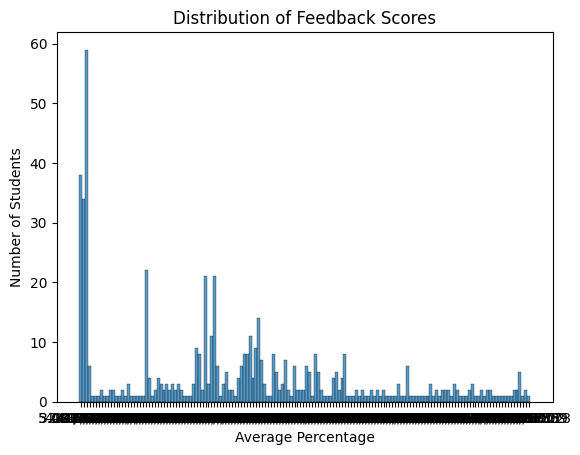

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Average/ Percentage"], bins=10)
plt.title("Distribution of Feedback Scores")
plt.xlabel("Average Percentage")
plt.ylabel("Number of Students")
plt.show()


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.columns = df.columns.str.strip()
df["Average_Percentage"] = df["Average/ Percentage"].str.split("/").str[1]
df["Average_Percentage"] = df["Average_Percentage"].str.strip().astype(float)

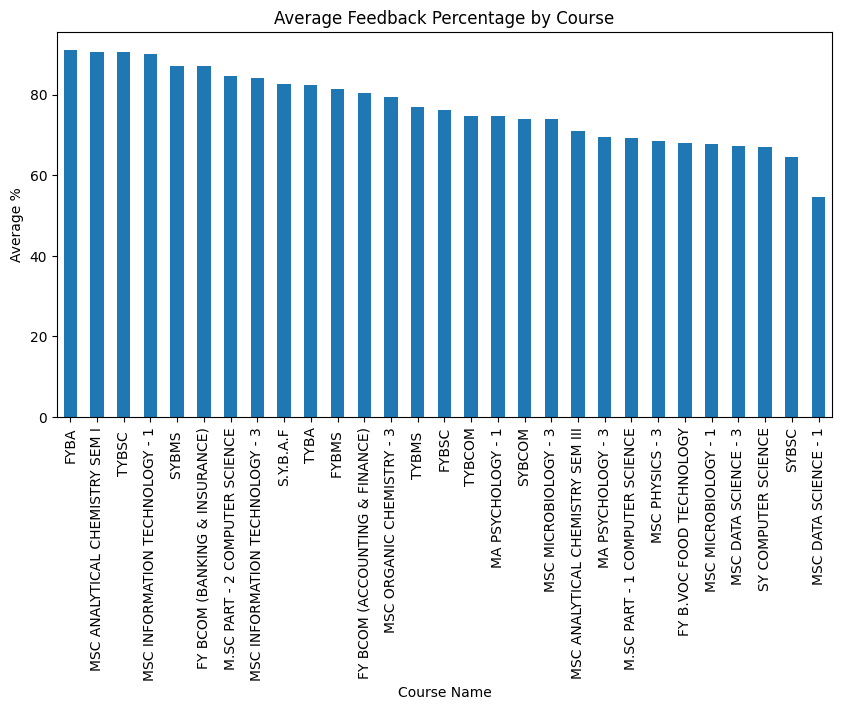

In [ ]:
df.groupby("Course Name")["Average_Percentage"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Average Feedback Percentage by Course")
plt.ylabel("Average %")
plt.show()


In [ ]:
df["Average_Rating"] = df["Average/ Percentage"].str.split("/").str[0].str.strip().astype(float)


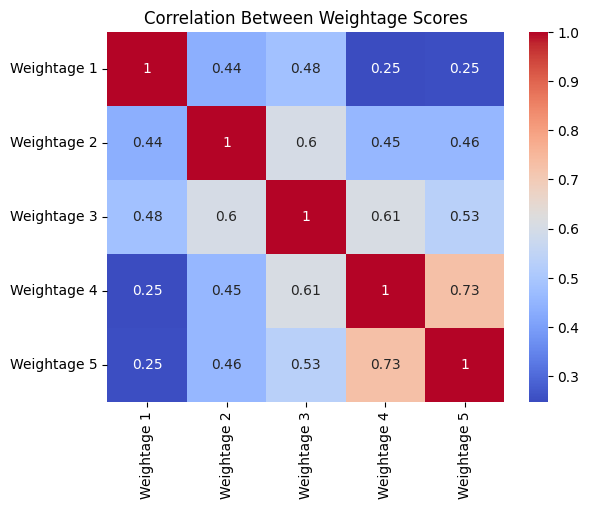

In [ ]:
weightage_cols = ['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']
df[weightage_cols] = df[weightage_cols].apply(pd.to_numeric, errors='coerce')

import seaborn as sns
corr = df[weightage_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Weightage Scores")
plt.show()


In [ ]:
df.groupby("Course Name")["Average_Percentage"].mean().sort_values(ascending=False).head(5)


,Average_Percentage
Course Name,
FYBA,91.000
MSC ANALYTICAL CHEMISTRY SEM I,90.500
TYBSC,90.444
MSC INFORMATION TECHNOLOGY - 1,90.000
SYBMS,87.143


In [ ]:
import pandas as pd

# Example: Assign one date per row, starting Jan 1, 2025
df["Timestamp"] = pd.date_range(start="2025-01-01", periods=len(df), freq="D")


<Axes: xlabel='Timestamp'>

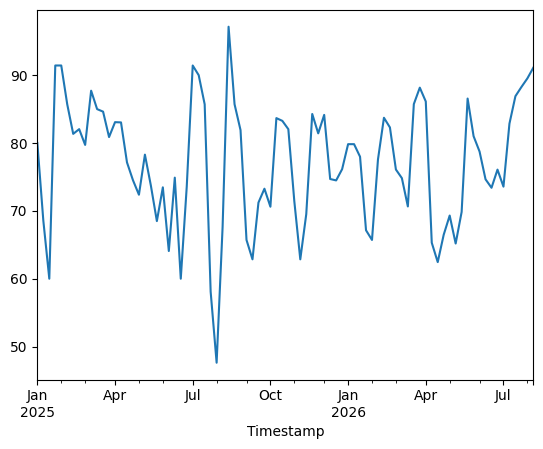

In [ ]:
df.set_index("Timestamp")["Average_Percentage"].resample("W").mean().plot()


In [ ]:
import numpy as np
import pandas as pd
from textblob import TextBlob

# Assuming your original dataframe is already loaded as `df`
sample_comments = [
    "Very engaging and informative event!",
    "It was an average experience.",
    "I didn’t enjoy the session. Poorly organized.",
    "The speaker was excellent, great content delivery.",
    "Not bad, but could have been better."
]

# Add random comments to all rows
df["Comments"] = np.random.choice(sample_comments, size=len(df))


In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Polarity"] = df["Comments"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment"] = df["Comments"].apply(get_sentiment)


In [ ]:
print(df[["Comments", "Polarity", "Sentiment"]].head())


                                            Comments  Polarity Sentiment
0               Very engaging and informative event!     0.650  Positive
1               Very engaging and informative event!     0.650  Positive
2  The speaker was excellent, great content deliv...     0.900  Positive
3               Not bad, but could have been better.     0.425  Positive
4      I didn’t enjoy the session. Poorly organized.     0.000   Neutral


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

df['sentiment_score'] = df['Questions'].apply(get_sentiment_score)
display(df[['Questions', 'sentiment_score']].head())

,Questions,sentiment_score
0,How much of the syllabus was covered in the cl...,0.0000
1,How well did the teachers prepare for the clas...,0.2732
2,How well were the teachers able to communicate?,0.2732
3,The teachers approach to teaching can best be...,0.6369
4,Fairness of the internal evaluation process by...,0.0000


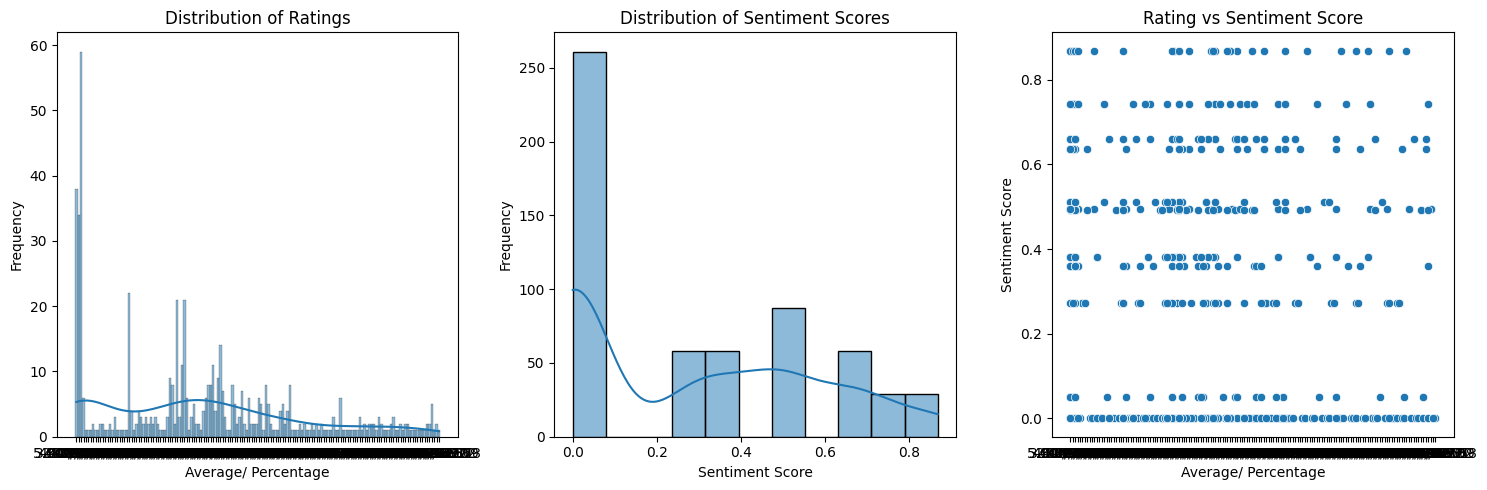

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Histogram of 'Average/ Percentage'
plt.subplot(1, 3, 1)
sns.histplot(df['Average/ Percentage'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Average/ Percentage')
plt.ylabel('Frequency')

# Histogram of 'sentiment_score'
plt.subplot(1, 3, 2)
sns.histplot(df['sentiment_score'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Scatter plot of 'Average/ Percentage' vs 'sentiment_score'
plt.subplot(1, 3, 3)
sns.scatterplot(x='Average/ Percentage', y='sentiment_score', data=df)
plt.title('Rating vs Sentiment Score')
plt.xlabel('Average/ Percentage')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()